In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [59]:
data = pd.read_csv("D://Topmentor Assignment and Project//iphone_purchase_records.csv")

In [25]:
data.head()

Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

In [60]:
data.isnull

<bound method DataFrame.isnull of      Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]>

In [61]:
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

print("Gender encoded successfully")

Gender encoded successfully


In [28]:
data.head()

Gender  Age  Salary  Purchase Iphone
0       1   19   19000                0
1       1   35   20000                0
2       0   26   43000                0
3       0   27   57000                0
4       1   19   76000                0

In [29]:
X = data[["Gender", "Age", "Salary"]]
y = data["Purchase Iphone"]
print("Features and target separated")

Features and target separated


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaling completed")

Features scaling completed


In [ ]:
#EDA Exploratory Data Analysis

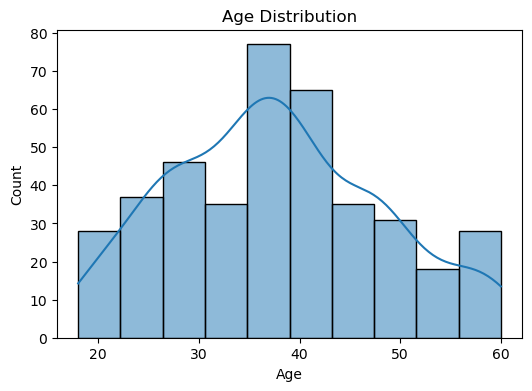

In [62]:
plt.figure(figsize=(6,4))
sns.histplot(data["Age"], kde=True)
plt.title("Age Distribution")
plt.show()
#Majority customers are between 25-45 age
# high purchaser age in between 35-40
# very few are below 20 and above 55 for purchasing iphone

In [63]:
plt.figure()
sns.histplot(data["Salary"], kde=True)
plt.title("Salary Distribution")
plt.show()

# it shows  around 50000 - 80000 purchase tendency is high
#more people are in lower/mid salary  ranges
#high salary people purchase less iphone

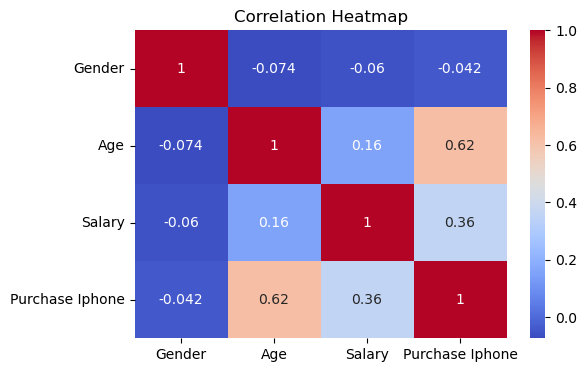

In [69]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
#plt.savefig("graphs/correlation_heatmap.png")
plt.show()

In [ ]:
#Age is the strongest predictor, folloed by salary while gender has no impact

In [55]:
data.shape

(400, 4)

In [37]:
y.shape

(400,)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

print("Train-test split done")
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Train-test split done
Training size: (300, 3)
Testing size: (100, 3)


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn. preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Feature scaling applied successfully")# avoid bias and for accurate prediction scalar used in classification

Feature scaling applied successfully


In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN Classifer model trained successfuly with k = 5")

KNN Classifer model trained successfuly with k = 5


In [ ]:
# Model Prediction

In [75]:
y_pred = knn.predict(X_test)
print("Predictions generated successfully")

Predictions generated successfully


In [ ]:
#Model Evaluation

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy:{accuracy:2f}")

Model Accuracy:0.920000


In [ ]:
#Confusion Matrix

In [79]:
cm = confusion_matrix(y_test, y_pred)
print("confusion Matrix:")
print(cm)

confusion Matrix:
[[58  5]
 [ 3 34]]


In [ ]:
#classification report

In [80]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.87      0.92      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
# finding k value

In [89]:
sqrt(len(data))

20.0

In [81]:
accuracy_list = []
for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, pred_k))

print("Accuracy calculated for k values from 1 to 20")

Accuracy calculated for k values from 1 to 20


In [ ]:
#Accuracy vs Plot

In [82]:
plt.figure(figsize=(6,4))
plt.plot(range(1,21), accuracy_list, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k Value")
plt.show()

In [94]:
data_results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred.round(2)
})
data_results.head()

Actual  Predicted
0       0          1
1       1          1
2       0          0
3       1          1
4       0          0

In [91]:
sns.lineplot(data= data_results, x = 'Actual', y = 'Predicted')

<Axes: xlabel='Actual', ylabel='Predicted'>

In [ ]:
# this graph shows a strong positve correlation betwwen actual and predicted values,
#indicating that the model predicts outcomes accurately with low variance


In [88]:
# Final Business Conclusion

print("Final Conclusion:")
print("The KNN classifier perform well after feature scaling")
print("More than Gender, Age and Salary are most important predictors for iphone")
print("This model helps business identify potential iphone buyers")


Final Conclusion:
The KNN classifier perform well after feature scaling
More than Gender, Age and Salary are most important predictors for iphone
This model helps business identify potential iphone buyers
